In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install stable-baselines3 numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [9]:
!ls /content/drive/MyDrive/models/


circuit_rl_model.zip


In [11]:
!cp "/content/drive/MyDrive/models/circuit_rl_model.zip" "/content/"


In [12]:
from stable_baselines3 import PPO

model_path = "/content/circuit_rl_model.zip"
model = PPO.load(model_path)
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [45]:
#4️⃣ Generate a New Dataset
import numpy as np
import pandas as pd

# Seed is NOT fixed to ensure randomness every time
# np.random.seed(42)  <-- Removed to ensure different datasets each time

# Generate new random Rs, Temperature, and Rl values
num_samples = 50  # Number of rows in the dataset
R_s_values = np.random.uniform(0.1, 5.0, num_samples)  # Series resistance
T_values = np.random.uniform(10, 100, num_samples)     # Temperature

# Function to compute power
def compute_power(Rs, Rl):
    V = 10  # Assume constant voltage source
    return (V**2 * Rl) / ((Rs + Rl) ** 2)

# Generate Rl values while ensuring Rl ≠ Rs
R_l_values = []
for Rs in R_s_values:
    Rl = np.random.uniform(0.1, 5.0)  # Generate Rl
    while np.isclose(Rl, Rs, atol=0.1):  # Avoid Rl ≈ Rs
        Rl = np.random.uniform(0.1, 5.0)
    R_l_values.append(Rl)

# Compute power values
Power_values = [compute_power(Rs, Rl) for Rs, Rl in zip(R_s_values, R_l_values)]

# Exclude the max power point
max_power = max(Power_values)
filtered_data = [(Rs, T, Rl, P) for Rs, T, Rl, P in zip(R_s_values, T_values, R_l_values, Power_values) if P < max_power]

# Convert to DataFrame
dataset = pd.DataFrame(filtered_data, columns=["Rs", "T", "Rl", "Power"])

# Save dataset
dataset_path = "new_circuit_data.csv"
dataset.to_csv(dataset_path, index=False)

# Display dataset
print("✅ New dataset generated and saved as", dataset_path)
dataset


✅ New dataset generated and saved as new_circuit_data.csv


,Rs,T,Rl,Power
0,1.884922,42.677407,4.068385,11.479037
1,2.566745,68.132552,1.347739,8.795426
2,3.482935,61.370047,3.825117,7.162119
3,0.292629,42.048705,3.018630,27.531094
4,4.017111,98.786372,2.410723,5.834693
5,3.176712,64.519734,2.118020,7.555133
6,0.500619,31.350411,1.809455,33.907516
7,4.380535,19.160423,4.654693,5.701811
8,4.612275,23.757323,4.170035,5.406575
9,0.399282,32.136196,4.828632,17.667181


In [46]:
#5️⃣ Verify That Max Power Point Is NOT in the Dataset
# Function to compute theoretical max power
def max_power(Rs):
    V = 10  # Constant voltage source
    return (V**2) / (4 * Rs)

# Compute theoretical max power for each Rs
max_power_values = [max_power(Rs) for Rs in dataset["Rs"]]

# Check if any row contains Rl ≈ Rs
max_point_found = False
for i, (Rs, Rl, P) in enumerate(zip(dataset["Rs"], dataset["Rl"], dataset["Power"])):
    if np.isclose(Rl, Rs, atol=0.1):  # Check if Rl is too close to Rs
        print(f"⚠️ Max power point found at index {i}: Rs={Rs:.3f}, Rl={Rl:.3f}")
        max_point_found = True

if not max_point_found:
    print("✅ No max power points found in the dataset.")



✅ No max power points found in the dataset.


In [47]:
# Generate predictions only for the filtered dataset
predicted_Rl = [model.predict([[T, Rs]])[0] for T, Rs in zip(dataset["T"], dataset["Rs"])]

# Compute power using predicted Rl
predicted_Power = [compute_power(Rs, Rl) for Rs, Rl in zip(dataset["Rs"], predicted_Rl)]

# Add predictions to the dataset
dataset["Predicted_Rl"] = predicted_Rl
dataset["Predicted_Power"] = predicted_Power

# Save updated dataset
predicted_dataset_path = "/content/predicted_circuit_data.csv"
dataset.to_csv(predicted_dataset_path, index=False)

# Show first few rows
dataset.head()


,Rs,T,Rl,Power,Predicted_Rl,Predicted_Power
0,1.884922,42.677407,4.068385,11.479037,[[2.5158904]],[[12.990503]]
1,2.566745,68.132552,1.347739,8.795426,[[3.3802142]],[[9.557722]]
2,3.482935,61.370047,3.825117,7.162119,[[2.5917902]],[[7.0233865]]
3,0.292629,42.048705,3.018630,27.531094,[[2.45781]],[[32.489582]]
4,4.017111,98.786372,2.410723,5.834693,[[4.603884]],[[6.1945486]]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


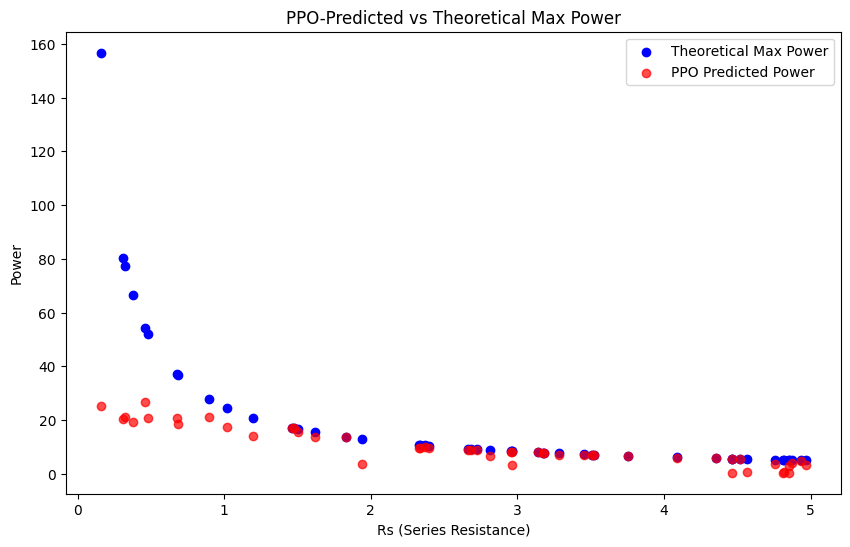

In [43]:
import matplotlib.pyplot as plt

# Compute theoretical max power
theoretical_Power = [max_power(Rs) for Rs in R_s_values]

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(R_s_values, theoretical_Power, color='blue', label="Theoretical Max Power")
plt.scatter(R_s_values, predicted_Power, color='red', label="PPO Predicted Power", alpha=0.7)
plt.xlabel("Rs (Series Resistance)")
plt.ylabel("Power")
plt.legend()
plt.title("PPO-Predicted vs Theoretical Max Power")
plt.show()
